In [1]:
# import requests
# import time
# import pandas as pd

# # Replace these with your credentials
# client_id = 'UZT7eG9q65gEwOc5IQgiKA'
# client_secret = 'EsaTm6IWzG9LCXn0-s2i9TLeV2agRg'
# username = 'rajender2003'
# password = 'Prreddy@2712'
# user_agent = 'CommentExtractor:v1.0 (by u/rajender2003)'

# # Step 1: Authenticate and get token
# auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
# data = {
#     'grant_type': 'password',
#     'username': username,
#     'password': password
# }
# headers = {'User-Agent': user_agent}

# # Get access token
# response = requests.post('https://www.reddit.com/api/v1/access_token',
#                     auth=auth, data=data, headers=headers)
# TOKEN = response.json()['access_token']
# headers['Authorization'] = f'bearer {TOKEN}'

# # Step 2: Initialize
# subreddit = 'askreddit'
# after = None
# all_comments = []
# target = 50000
# count = 1

# # Step 3: Loop through posts and collect comments
# while len(all_comments) < target:
#     params = {'limit': 200}
#     if after:
#         params['after'] = after

#     posts_res = requests.get(f"https://oauth.reddit.com/r/{subreddit}/hot",
#                              headers=headers, params=params)
#     posts = posts_res.json().get('data', {}).get('children', [])

#     if not posts:
#         break

#     for post in posts:
#         post_id = post['data']['id']
#         post_title = post['data']['title']

#         # Get comments for this post
#         try:
#             comments_res = requests.get(f"https://oauth.reddit.com/comments/{post_id}",
#                                         headers=headers, params={'limit': 500})
#             comment_items = comments_res.json()[1]['data']['children']
#             for item in comment_items:
#                 if item['kind'] != 't1':
#                     continue
#                 body = item['data'].get('body')
#                 if body and body not in ['[removed]', '[deleted]']:
#                     all_comments.append({
#                         'post_id': post_id,
#                         'comment': body,
#                         'score': item['data'].get('score'),
#                         'author': item['data'].get('author'),
#                         'created_utc': item['data'].get('created_utc')
#                     })
#             print(f"post-{count} → {len(comment_items)} comments | Total: {len(all_comments)}")
#             count += 1
#             if len(all_comments) >= target:
#                 break

#         except Exception as e:
#             print(f"Error fetching comments from post {post_id}: {e}")

#     after = posts[-1]['data']['name']

# # Step 4: Save to files
# df = pd.DataFrame(all_comments)
# df.to_csv("reddit_comments.csv", index=False)
# df.to_json("reddit_comments.json", orient="records", lines=True)

# print(f"\nDone! Total comments: {len(df)}")


In [2]:
import pandas as pd
df = pd.read_csv("reddit_comments.csv")

In [3]:
df = df.drop(columns = ["post_id","score","author","created_utc"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19955 entries, 0 to 19954
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  19954 non-null  object
dtypes: object(1)
memory usage: 156.0+ KB


In [5]:
df.dropna(inplace = True)

In [6]:
df.duplicated().sum()

np.int64(539)

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

np.int64(0)

## **Text Length Analysis:** 

In [9]:
df["review_length"] = df["comment"].apply(len)

In [10]:
print(df["review_length"].describe())

count    19415.000000
mean       119.018851
std        202.237628
min          1.000000
25%         24.000000
50%         57.000000
75%        130.000000
max       4467.000000
Name: review_length, dtype: float64


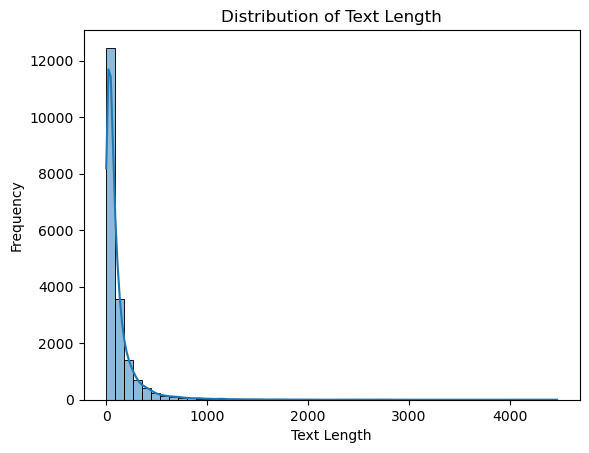

In [11]:
# Histogram of text lengths

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df,x = "review_length",bins = 50,kde = True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

## **Word Frequency Analysis:**

In [12]:
from collections import Counter
import re

# Function to clean text and extract words
def get_words(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]","",text) # Remove special characters
    words = text.split()
    return words
    
# Get all the words from the dataset
all_words = df["comment"].apply(get_words).sum()

# Count word Frequencies
word_counts = Counter(all_words)

# Display the most common words
print(word_counts.most_common(10))

[('the', 14223), ('and', 11787), ('i', 11018), ('to', 10952), ('a', 10573), ('of', 6984), ('in', 5540), ('it', 5448), ('my', 4905), ('that', 4663)]


## **Word Cloud Visualization:**

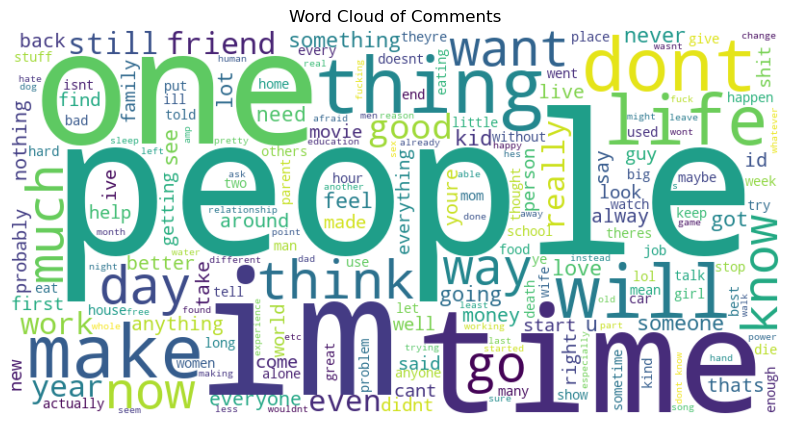

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(" ".join(all_words))

plt.figure(figsize = (10,5))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Comments")
plt.show()

## **Text Preprocessing:**

In [14]:
# Converting into lower case

df["comment"] = df["comment"].str.lower()

In [15]:
# Removing punctuations, special characters, urls, hashtags
import re

def removing(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove @mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    text = re.sub(r'\n','',text)
    text = re.sub(r'\xa0','',text)
    return text
df["comment"] = df["comment"].apply(removing)

In [16]:
# def pattern(text):
#     text = re.findall(r'[^a-zA-Z]',text)
#     print(text)
# df["comment"].apply(pattern)

In [17]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt") 
nltk.download("punkt_tab")

def tokenizer(text):
    text = word_tokenize(text)
    return text
    
df["comment"] = df["comment"].apply(tokenizer)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
# Stop words removal
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def stop_words_removal(words_list):
    words_list = [word for word in words_list if word not in stop_words]
    return words_list

df["comment"] = df["comment"].apply(stop_words_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Applying Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def lemmatization(words_list):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_list]
    return lemmatized_words

df["comment"] = df["comment"].apply(lemmatization)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def string_format(words_list):
    return " ".join(words_list)

df["comment"] = df["comment"].apply(string_format)

In [21]:
df.duplicated().sum()

np.int64(199)

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['comment'].apply(get_sentiment)

In [24]:
df["sentiment"].value_counts()

sentiment
neutral     11330
positive     5106
negative     2780
Name: count, dtype: int64

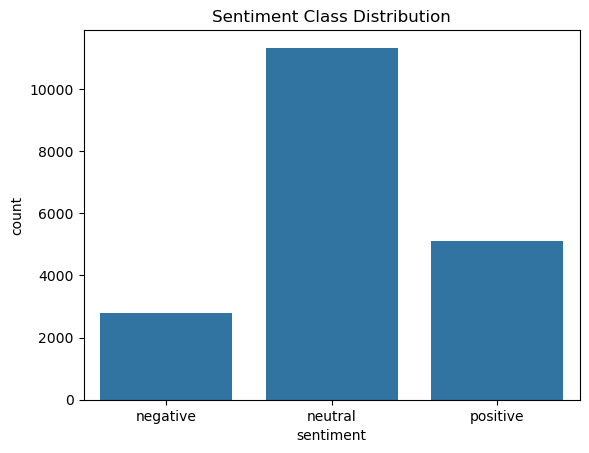

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Prepare data
X = df['comment']          # Preprocessed comments
y = df['sentiment']        # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
lr_pipeline.fit(X_train, y_train)

# Evaluate
accuracy = lr_pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8249


In [27]:
new_comment = ["This is actually good"]
predicted = lr_pipeline.predict(new_comment)
print("Predicted Sentiment:", predicted[0])

Predicted Sentiment: positive


In [28]:
# Build pipeline
from sklearn.tree import DecisionTreeClassifier
dtc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('dtc', DecisionTreeClassifier())
])

# Fit the pipeline
dtc_pipeline.fit(X_train, y_train)

# Evaluate
accuracy = dtc_pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8007


In [29]:
# Build pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8020


In [30]:
# # Build pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('smote', SMOTE(random_state=42)),
#     ('clf', SVC(probability = True))
# ])

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Evaluate
# accuracy = pipeline.score(X_test, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

In [31]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE

# # 1. Split the data
# X = df['comment']
# y = df['sentiment']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # 2. TF-IDF vectorization before SMOTE
# tfidf = TfidfVectorizer()
# X_train_vec = tfidf.fit_transform(X_train)
# X_test_vec = tfidf.transform(X_test)

# # 3. Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

# # 4. Define individual classifiers
# knn = KNeighborsClassifier()
# nb = MultinomialNB()
# svc = SVC(probability=True)  # enable predict_proba for soft voting
# lr = LogisticRegression(max_iter=1000)
# rf = RandomForestClassifier()

# # 5. Create VotingClassifier with soft voting
# voting_clf = VotingClassifier(
#     estimators=[
#         ('knn', knn),
#         ('nb', nb),
#         ('svc', svc),
#         ('lr', lr),
#         ('rf', rf)
#     ],
#     voting='hard'
# )

# # 6. Final pipeline
# pipeline = Pipeline([
#     ('model', voting_clf)
# ])

# # 7. Fit and evaluate
# pipeline.fit(X_train_res, y_train_res)
# y_pred = pipeline.predict(X_test_vec)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [35]:
import pickle
with open("text_pipeline.pkl","wb") as f:
    pickle.dump(lr_pipeline,f)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TF-IDF Vectorizer
# vectorizer = TfidfVectorizer()
# # Transform the text into TF-IDF Representation 
# tfidf_matrix = vectorizer.fit_transform(df["comment"])
# # Display results
# tfidf_features = vectorizer.get_feature_names_out()
# print("Vocabulary:",tfidf_features)
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf_features)
# tfidf_df

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# # First: Separate features (X) and target (y)
# X = tfidf_matrix  # Your TF-IDF vectorized comments (sparse matrix)
# y = df['sentiment']  # Target variable (3 classes)

# # Optional: Encode labels (SMOTE works with numeric labels)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  # e.g., neutral→0, negative→1, positive→2

# # Split data (SMOTE is usually applied only on training set to avoid data leakage)
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [ ]:
# sentiment_bal = pd.DataFrame(y_train_bal,columns = ["sentiment"])
# sentiment_bal.value_counts()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(data=sentiment_bal, x='sentiment')
# plt.title("Sentiment Class Distribution")
# plt.show()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# lr = LogisticRegression()
# lr_pipeline = Pipeline(steps = [("Logistic_reg",lr)])
# lr_pipeline.fit(X_train_bal,y_train_bal)

In [ ]:
# y_pred = lr_pipeline.predict(X_test)
# from sklearn.metrics import accuracy_score
# print("Accuracy:",accuracy_score(y_test,y_pred))